#### InPainting
What if we have  certain sections of the input image while developing something new in other areas? This is referred to as 'inpainting'. Although it's achievable with the same model used in earlier demos (via the StableDiffusionInpaintPipelineLegacy), higher results can be achieved by employing a custom fine-tuned version of Stable Diffusion. This version accepts a masked image and the mask itself as extra conditioning. The mask image should have the same proportions as the input image, with white signifying the areas to be replaced and black indicating the areas to remain untouched. Below is the process for loading such a pipeline and applying it to the example picture and mask loaded.


![inpainting unet](../images/inpaint_w_border.jpg)

In [1]:
import torch
from diffusers import StableDiffusionInpaintPipeline
import os

os.environ[
    "PYTORCH_HIP_ALLOC_CONF"] = "garbage_collection_threshold:0.9,max_split_size_mb:128"
device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
# Load the inpainting pipeline (requires a suitable inpainting model)
pipe = StableDiffusionInpaintPipeline.from_pretrained("runwayml/stable-diffusion-inpainting")
pipe = pipe.to(device)

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/sajjad/PycharmProjects/my/.venv/lib/python3.10/site-packages/diffusers/models/attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ../aten/src/ATen/native/transformers/hip/sdp_utils.cpp:264.)
  hidden_states = F.scaled_dot_product_attention(
/home/sajjad/PycharmProjects/my/.venv/lib/python3.10/site-packages/diffusers/models/attention_processor.py:1244: UserWarning: 1Torch was not compiled with memory efficient attention. (Triggered internally at ../aten/src/ATen/native/transformers/hip/sdp_utils.cpp:320.)
  hidden_states = F.scaled_dot_product_attention(


  0%|          | 0/50 [00:00<?, ?it/s]

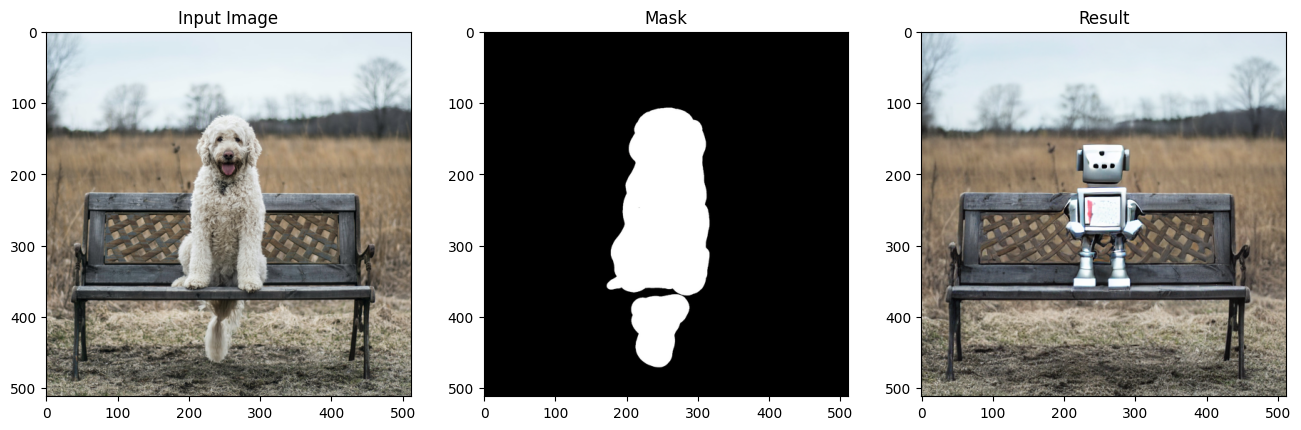

In [2]:
from utils import download_image
from matplotlib import pyplot as plt


init_image = download_image('input_for_img2img.png').resize((512, 512))
mask_image = download_image('input_mask_for_img2img.png').resize((512, 512))

prompt = "A small robot, high resolution, sitting on a park bench"
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image).images[0]

fig, axs = plt.subplots(1, 3, figsize=(16, 5))
axs[0].imshow(init_image);axs[0].set_title('Input Image')
axs[1].imshow(mask_image);axs[1].set_title('Mask')
axs[2].imshow(image);axs[2].set_title('Result');